In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# To Load the dataset
df = pd.read_csv('../data/fake_news_data.csv')

In [11]:
# Dataset Information
print("Dataset Info:")
print(df.info()) 

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15337 entries, 0 to 15336
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   article_id     15337 non-null  int64 
 1   title          15017 non-null  object
 2   description    15291 non-null  object
 3   news_url       15128 non-null  object
 4   source_domain  15128 non-null  object
 5   real           15337 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 719.0+ KB
None


In [12]:
# To display first 5 rows of the dataset
print("\nFirst 5 Rows of the Dataset:")
print(df.head())  


First 5 Rows of the Dataset:
   article_id                                              title  \
0          42  Watch The Exact Moment Paul Ryan Committed Pol...   
1         527        Kerry to go to Paris in gesture of sympathy   
2          63  Bernie supporters on Twitter erupt in anger ag...   
3          20   The Battle of New York: Why This Primary Matters   
4          38                                        Tehran, USA   

                                         description  \
0  Google Pinterest Digg Linkedin Reddit Stumbleu...   
1  U.S. Secretary of State John F. Kerry said Mon...   
2  — Kaydee King (@KaydeeKing) November 9, 2016 T...   
3  It's primary day in New York and front-runners...   
4    \nI’m not an immigrant, but my grandparents ...   

                                            news_url        source_domain  \
0  http://toofab.com/2017/05/08/real-housewives-a...           toofab.com   
1  https://www.today.com/style/see-people-s-choic...        www.today.

In [13]:
# Checking for missing values
missing_values = df.isnull().sum()
total_missing = missing_values.sum() 
print("\nMissing Values Count:")
print(missing_values)  
print(f"\nTotal Missing Values in the Dataset: {total_missing}")


Missing Values Count:
article_id         0
title            320
description       46
news_url         209
source_domain    209
real               0
dtype: int64

Total Missing Values in the Dataset: 784


In [14]:
# Checking for duplicates values based on the 'title'
num_duplicates = df.duplicated(subset='title').sum()
print(f"\nNumber of Duplicate Titles: {num_duplicates}")


Number of Duplicate Titles: 2899


In [15]:
# Show value counts for the 'real' column (fake or real news)
print("\nDistribution of Real vs Fake News:")
print(df['real'].value_counts())


Distribution of Real vs Fake News:
real
0    8320
1    7017
Name: count, dtype: int64


C:\Users\ejaz4\AppData\Local\Temp\ipykernel_32064\113273723.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=real_counts_df, x='Type', y='Percentage', palette='viridis')


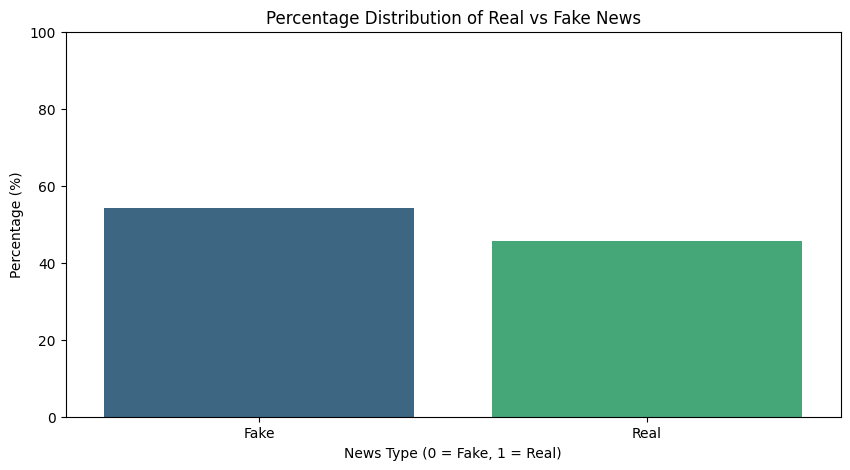

In [16]:
# Distribution of 'real' or 'Fake' column as percentages
real_counts = df['real'].value_counts(normalize=True) * 100 
real_counts = real_counts.sort_index()

# Creating a DataFrame for plotting
real_counts_df = pd.DataFrame({'Type': ['Fake', 'Real'], 'Percentage': real_counts.values})

# Plot the percentage distribution
plt.figure(figsize=(10, 5))
sns.barplot(data=real_counts_df, x='Type', y='Percentage', palette='viridis')
plt.title('Percentage Distribution of Real vs Fake News')
plt.xlabel('News Type (0 = Fake, 1 = Real)')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.show()